# Yelp Data Challenge - Data Preprocessing

BitTiger DS501

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [2]:
import json
import pandas as pd

In [3]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review_after2016.json',
    'dataset/tip.json',
    'dataset/user.json'
]

#### Business Data

In [ ]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [ ]:
df_business.head(2)

In [ ]:
df_business.info()

#### Checkin Data

In [ ]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)
# df_checkin.head(2)

#### Review Data

In [ ]:
# with open(file_review) as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
# df_review.head(2)

#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [ ]:
temp = df_business[df_business['city'] == 'Las Vegas'].dropna(subset = ['categories'])
df_filtered = temp[temp['categories'].apply(lambda x: True if 'Restaurants' in x else False)]
del temp

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [ ]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [ ]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [ ]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={"stars":"avg_stars"}, inplace = True)

In [ ]:
# Inspect your DataFrame
df_selected_business.head()

#### Save results to csv files

In [ ]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('dataset/selected_business.csv', index = False)

In [15]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('dataset/selected_business.csv')

### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [4]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Prepare dataframes to be joined, - on business_id

In [16]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.head(2)

,name,categories,avg_stars
business_id,,,
LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0
QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"['Mexican', 'Restaurants']",3.5


In [7]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')
df_right.head(2)

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Join! and reset index

In [19]:
# Join df_left and df_right. What type of join?
df_joined = df_left.join(df_right, how = "inner")
print(df_joined.shape)
print(df_right.shape)
print(df_left.shape)

(286608, 11)
(1690348, 8)
(5682, 3)


In [20]:
# You may want to reset the index 
df_joined.reset_index(inplace = True)

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [21]:
# Make a filter that selects date after 2015-01-20
cond_last_years = df_joined['date'] > u'2016-01-20'

In [22]:
# Filter the joined DataFrame and name it as df_final
df_joined = df_joined[cond_last_years]

#### Take a glance at the final dataset

* Do more EDA here as you like!

In [23]:
import matplotlib.pyplot as plt

% matplotlib inline

<function matplotlib.pyplot.show>

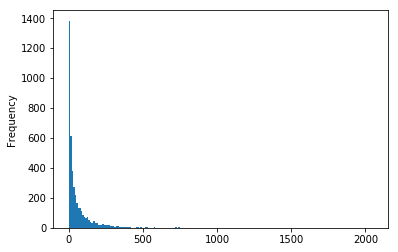

In [33]:
# e.g. calculate counts of reviews per business entity, and plot it
df_joined['business_id'].value_counts().plot.hist(bins = 200)
plt.show

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [31]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_joined.to_csv('dataset/last_2_years_restaurant_reviews.csv', index = False)